In [1]:
# imports 
import numpy as np
from math import sqrt 
from pprint import pprint
from numpy import array
from scipy.io import arff
import pandas as pd
from time import time

In [2]:
# load data
df=pd.read_csv('ALOI_norm.csv')  

del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att19,att20,att21,att22,att23,att24,att25,att26,att27,outlier
0,0.784999,0.000018,0.0,0.000093,0.0,0.0,0.0,0.0,0.0,0.139811,...,0.048171,0.001189,0.0,0.115728,0.023449,0.0002,0.000220,0.034952,0.046914,1
1,0.958088,0.000000,0.0,0.001671,0.0,0.0,0.0,0.0,0.0,0.019556,...,0.000000,0.000000,0.0,0.022035,0.007516,0.0000,0.000000,0.001033,0.000000,1
2,0.938768,0.000000,0.0,0.005146,0.0,0.0,0.0,0.0,0.0,0.018451,...,0.000000,0.000000,0.0,0.035542,0.011982,0.0000,0.001595,0.019520,0.000000,1
3,0.954775,0.000000,0.0,0.001427,0.0,0.0,0.0,0.0,0.0,0.024944,...,0.000000,0.000000,0.0,0.019941,0.000805,0.0000,0.000000,0.000035,0.000000,1
4,0.933601,0.000000,0.0,0.001682,0.0,0.0,0.0,0.0,0.0,0.037002,...,0.000000,0.000000,0.0,0.046759,0.002663,0.0000,0.000339,0.001359,0.000000,1


In [3]:
df.shape

(50000, 28)

In [4]:
# data to values
df = df.values

In [5]:
# Extratrees Deep
import argparse
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/aloi.json")
gc = GCForest(config)

In [6]:
# train test 
from sklearn.cross_validation import train_test_split
y = df[:,27]
X = df[:,0:27]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# number of class
len(np.unique(y_train))

2

In [8]:
# X_enc is the concatenated predict_proba result of DeepExtraTrees
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
# Make data + estimators
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

# New data
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-27 20:21:13,883][cascade_classifier.fit_transform] X_groups_train.shape=[(33500, 27)],y_train.shape=(33500,),X_groups_test.shape=[(16500, 27)],y_test.shape=(16500,)
[ 2018-07-27 20:21:13,887][cascade_classifier.fit_transform] group_dims=[27]
[ 2018-07-27 20:21:13,888][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:21:13,889][cascade_classifier.fit_transform] group_ends=[27]
[ 2018-07-27 20:21:13,890][cascade_classifier.fit_transform] X_train.shape=(33500, 27),X_test.shape=(16500, 27)
[ 2018-07-27 20:21:13,896][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(33500, 27), X_cur_test.shape=(16500, 27)
[ 2018-07-27 20:21:15,360][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.37%
[ 2018-07-27 20:21:17,060][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.37%
[ 2018-07-27 20:21:18,690][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estim

Test Accuracy of DeepExtratTrees = 97.042424 %
[[15968     2]
 [  486    44]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98     15970
        1.0       0.96      0.08      0.15       530

avg / total       0.97      0.97      0.96     16500



[ 2018-07-27 20:21:35,208][cascade_classifier.fit_transform] X_groups_train.shape=[(33500, 29)],y_train.shape=(33500,),X_groups_test.shape=[(16500, 29)],y_test.shape=(16500,)
[ 2018-07-27 20:21:35,212][cascade_classifier.fit_transform] group_dims=[29]
[ 2018-07-27 20:21:35,212][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:21:35,213][cascade_classifier.fit_transform] group_ends=[29]
[ 2018-07-27 20:21:35,214][cascade_classifier.fit_transform] X_train.shape=(33500, 29),X_test.shape=(16500, 29)
[ 2018-07-27 20:21:35,220][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(33500, 29), X_cur_test.shape=(16500, 29)
[ 2018-07-27 20:21:36,455][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.88%
[ 2018-07-27 20:21:37,963][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.79%
[ 2018-07-27 20:21:39,475][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estim

Test Accuracy of DeepExtratTrees = 97.733333 %
[[15936    34]
 [  340   190]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     15970
        1.0       0.85      0.36      0.50       530

avg / total       0.97      0.98      0.97     16500



In [9]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")


[ 2018-07-27 20:21:52,120][cascade_classifier.fit_transform] X_groups_train.shape=[(33500, 29)],y_train.shape=(33500,),X_groups_test.shape=[(16500, 29)],y_test.shape=(16500,)
[ 2018-07-27 20:21:52,123][cascade_classifier.fit_transform] group_dims=[29]
[ 2018-07-27 20:21:52,124][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:21:52,124][cascade_classifier.fit_transform] group_ends=[29]
[ 2018-07-27 20:21:52,125][cascade_classifier.fit_transform] X_train.shape=(33500, 29),X_test.shape=(16500, 29)
[ 2018-07-27 20:21:52,129][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(33500, 29), X_cur_test.shape=(16500, 29)
[ 2018-07-27 20:21:53,280][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.82%
[ 2018-07-27 20:21:54,664][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.82%
[ 2018-07-27 20:21:56,039][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estim

('Test Accuracy of DeepExtratTrees = 97.769697 %', 'Layer :', 0)
[[15944    26]
 [  342   188]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     15970
        1.0       0.88      0.35      0.51       530

avg / total       0.98      0.98      0.97     16500

(' Time ', '13.884', ' seconds')


[ 2018-07-27 20:22:09,674][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.61%
[ 2018-07-27 20:22:11,043][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.82%
[ 2018-07-27 20:22:12,401][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.06%
[ 2018-07-27 20:22:13,768][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.73%
[ 2018-07-27 20:22:15,129][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.73%
[ 2018-07-27 20:22:16,492][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.82%
[ 2018-07-27 20:22:17,868][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.70%
[ 2018-07-27 20:22:19,238][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.64%


('Test Accuracy of DeepExtratTrees = 97.660606 %', 'Layer :', 1)
[[15947    23]
 [  363   167]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     15970
        1.0       0.88      0.32      0.46       530

avg / total       0.97      0.98      0.97     16500

(' Time ', '13.823', ' seconds')


[ 2018-07-27 20:22:25,981][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.67%
[ 2018-07-27 20:22:27,350][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.73%
[ 2018-07-27 20:22:28,708][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.18%
[ 2018-07-27 20:22:30,069][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.06%
[ 2018-07-27 20:22:31,552][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.73%
[ 2018-07-27 20:22:32,917][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.91%
[ 2018-07-27 20:22:34,294][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.73%
[ 2018-07-27 20:22:35,882][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.70%


('Test Accuracy of DeepExtratTrees = 97.660606 %', 'Layer :', 2)
[[15955    15]
 [  371   159]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     15970
        1.0       0.91      0.30      0.45       530

avg / total       0.98      0.98      0.97     16500

(' Time ', '14.269', ' seconds')


[ 2018-07-27 20:22:42,701][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.61%
[ 2018-07-27 20:22:44,193][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.76%
[ 2018-07-27 20:22:45,675][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.94%
[ 2018-07-27 20:22:47,145][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.88%
[ 2018-07-27 20:22:48,515][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.70%
[ 2018-07-27 20:22:49,884][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.76%
[ 2018-07-27 20:22:51,382][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.58%
[ 2018-07-27 20:22:52,870][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.82%


('Test Accuracy of DeepExtratTrees = 97.569697 %', 'Layer :', 3)
[[15952    18]
 [  383   147]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     15970
        1.0       0.89      0.28      0.42       530

avg / total       0.97      0.98      0.97     16500

(' Time ', '14.619', ' seconds')


[ 2018-07-27 20:22:59,581][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.73%
[ 2018-07-27 20:23:01,079][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.67%
[ 2018-07-27 20:23:02,566][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.06%
[ 2018-07-27 20:23:04,053][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.03%
[ 2018-07-27 20:23:05,428][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.64%
[ 2018-07-27 20:23:06,793][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.73%
[ 2018-07-27 20:23:08,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.61%
[ 2018-07-27 20:23:09,641][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.70%


('Test Accuracy of DeepExtratTrees = 97.521212 %', 'Layer :', 4)
[[15949    21]
 [  388   142]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     15970
        1.0       0.87      0.27      0.41       530

avg / total       0.97      0.98      0.97     16500

(' Time ', '14.433', ' seconds')


[ 2018-07-27 20:23:16,684][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.64%
[ 2018-07-27 20:23:18,176][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.58%
[ 2018-07-27 20:23:19,659][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.06%
[ 2018-07-27 20:23:21,156][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.94%
[ 2018-07-27 20:23:22,646][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.49%
[ 2018-07-27 20:23:24,113][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.73%
[ 2018-07-27 20:23:25,476][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.37%
[ 2018-07-27 20:23:26,983][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.64%


('Test Accuracy of DeepExtratTrees = 97.490909 %', 'Layer :', 5)
[[15947    23]
 [  391   139]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     15970
        1.0       0.86      0.26      0.40       530

avg / total       0.97      0.97      0.97     16500

(' Time ', '14.687', ' seconds')


[ 2018-07-27 20:23:33,886][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.61%
[ 2018-07-27 20:23:35,368][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.58%
[ 2018-07-27 20:23:36,946][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.91%
[ 2018-07-27 20:23:38,686][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.91%
[ 2018-07-27 20:23:40,228][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.49%
[ 2018-07-27 20:23:41,999][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.73%
[ 2018-07-27 20:23:44,202][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.49%
[ 2018-07-27 20:23:45,957][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.55%


('Test Accuracy of DeepExtratTrees = 97.484848 %', 'Layer :', 6)
[[15950    20]
 [  395   135]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     15970
        1.0       0.87      0.25      0.39       530

avg / total       0.97      0.97      0.97     16500

(' Time ', '16.842', ' seconds')


[ 2018-07-27 20:23:53,278][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.67%
[ 2018-07-27 20:23:54,769][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.61%
[ 2018-07-27 20:23:56,239][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.76%
[ 2018-07-27 20:23:57,717][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.88%
[ 2018-07-27 20:23:59,205][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.52%
[ 2018-07-27 20:24:00,708][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.79%
[ 2018-07-27 20:24:02,202][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.55%
[ 2018-07-27 20:24:03,688][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.64%


('Test Accuracy of DeepExtratTrees = 97.369697 %', 'Layer :', 7)
[[15950    20]
 [  414   116]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.85      0.22      0.35       530

avg / total       0.97      0.97      0.97     16500

(' Time ', '14.909', ' seconds')


[ 2018-07-27 20:24:10,664][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.70%
[ 2018-07-27 20:24:12,154][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.64%
[ 2018-07-27 20:24:13,595][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.85%
[ 2018-07-27 20:24:15,079][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.85%
[ 2018-07-27 20:24:16,452][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.46%
[ 2018-07-27 20:24:17,824][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.73%
[ 2018-07-27 20:24:19,305][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.52%
[ 2018-07-27 20:24:20,785][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.58%


('Test Accuracy of DeepExtratTrees = 97.418182 %', 'Layer :', 8)
[[15950    20]
 [  406   124]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     15970
        1.0       0.86      0.23      0.37       530

avg / total       0.97      0.97      0.97     16500

(' Time ', '14.647', ' seconds')


[ 2018-07-27 20:24:27,782][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.64%
[ 2018-07-27 20:24:29,287][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.67%
[ 2018-07-27 20:24:30,798][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.79%
[ 2018-07-27 20:24:32,306][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.88%
[ 2018-07-27 20:24:33,789][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.55%
[ 2018-07-27 20:24:35,388][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.64%
[ 2018-07-27 20:24:36,950][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.61%
[ 2018-07-27 20:24:38,561][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.64%


('Test Accuracy of DeepExtratTrees = 97.418182 %', 'Layer :', 9)
[[15949    21]
 [  405   125]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     15970
        1.0       0.86      0.24      0.37       530

avg / total       0.97      0.97      0.97     16500

(' Time ', '15.254', ' seconds')


[ 2018-07-27 20:24:45,572][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.73%
[ 2018-07-27 20:24:47,078][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.55%
[ 2018-07-27 20:24:48,587][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.76%
[ 2018-07-27 20:24:50,050][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.79%
[ 2018-07-27 20:24:51,561][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.61%
[ 2018-07-27 20:24:53,054][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.52%
[ 2018-07-27 20:24:54,559][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.61%
[ 2018-07-27 20:24:56,420][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.58%


('Test Accuracy of DeepExtratTrees = 97.375758 %', 'Layer :', 10)
[[15947    23]
 [  410   120]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.84      0.23      0.36       530

avg / total       0.97      0.97      0.97     16500

(' Time ', '16.56', ' seconds')


[ 2018-07-27 20:25:04,840][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.61%
[ 2018-07-27 20:25:06,277][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.61%
[ 2018-07-27 20:25:07,760][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.64%
[ 2018-07-27 20:25:09,191][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.76%
[ 2018-07-27 20:25:10,682][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.67%
[ 2018-07-27 20:25:12,165][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.49%
[ 2018-07-27 20:25:13,658][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.58%
[ 2018-07-27 20:25:15,157][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.52%


('Test Accuracy of DeepExtratTrees = 97.339394 %', 'Layer :', 11)
[[15943    27]
 [  412   118]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.81      0.22      0.35       530

avg / total       0.97      0.97      0.97     16500

(' Time ', '14.818', ' seconds')


[ 2018-07-27 20:25:22,599][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.61%
[ 2018-07-27 20:25:24,072][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.49%
[ 2018-07-27 20:25:25,540][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.64%
[ 2018-07-27 20:25:27,046][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.76%
[ 2018-07-27 20:25:28,554][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.52%
[ 2018-07-27 20:25:30,024][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.55%
[ 2018-07-27 20:25:31,512][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.61%
[ 2018-07-27 20:25:33,005][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.52%


('Test Accuracy of DeepExtratTrees = 97.321212 %', 'Layer :', 12)
[[15942    28]
 [  414   116]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.81      0.22      0.34       530

avg / total       0.97      0.97      0.97     16500

(' Time ', '15.374', ' seconds')


[ 2018-07-27 20:25:40,408][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.37%
[ 2018-07-27 20:25:42,480][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.58%
[ 2018-07-27 20:25:44,046][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.55%
[ 2018-07-27 20:25:45,518][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.82%
[ 2018-07-27 20:25:47,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.64%
[ 2018-07-27 20:25:48,535][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.67%
[ 2018-07-27 20:25:50,013][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.58%
[ 2018-07-27 20:25:51,515][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.55%


('Test Accuracy of DeepExtratTrees = 97.242424 %', 'Layer :', 13)
[[15947    23]
 [  432    98]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.81      0.18      0.30       530

avg / total       0.97      0.97      0.96     16500

(' Time ', '15.981', ' seconds')


[ 2018-07-27 20:25:58,471][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.43%
[ 2018-07-27 20:26:00,129][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.58%
[ 2018-07-27 20:26:02,154][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.58%
[ 2018-07-27 20:26:03,855][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.82%
[ 2018-07-27 20:26:05,374][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.58%
[ 2018-07-27 20:26:06,878][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.64%
[ 2018-07-27 20:26:08,370][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.46%
[ 2018-07-27 20:26:09,868][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.52%


('Test Accuracy of DeepExtratTrees = 97.272727 %', 'Layer :', 14)
[[15944    26]
 [  424   106]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.80      0.20      0.32       530

avg / total       0.97      0.97      0.96     16500

(' Time ', '15.91', ' seconds')


[ 2018-07-27 20:26:16,848][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.34%
[ 2018-07-27 20:26:18,364][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.58%
[ 2018-07-27 20:26:20,039][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.61%
[ 2018-07-27 20:26:22,210][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.67%
[ 2018-07-27 20:26:23,968][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.52%
[ 2018-07-27 20:26:25,458][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.76%
[ 2018-07-27 20:26:26,886][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.58%
[ 2018-07-27 20:26:28,388][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.49%


('Test Accuracy of DeepExtratTrees = 97.248485 %', 'Layer :', 15)
[[15946    24]
 [  430   100]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.81      0.19      0.31       530

avg / total       0.97      0.97      0.96     16500

(' Time ', '16.009', ' seconds')


[ 2018-07-27 20:26:35,426][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-27 20:26:36,993][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.61%
[ 2018-07-27 20:26:38,479][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.52%
[ 2018-07-27 20:26:40,033][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.58%
[ 2018-07-27 20:26:42,366][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.52%
[ 2018-07-27 20:26:44,899][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.67%
[ 2018-07-27 20:26:46,896][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.64%
[ 2018-07-27 20:26:48,601][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.52%


('Test Accuracy of DeepExtratTrees = 97.242424 %', 'Layer :', 16)
[[15949    21]
 [  434    96]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.82      0.18      0.30       530

avg / total       0.97      0.97      0.96     16500

(' Time ', '17.727', ' seconds')


[ 2018-07-27 20:26:55,602][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.34%
[ 2018-07-27 20:26:57,072][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.43%
[ 2018-07-27 20:26:58,551][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.49%
[ 2018-07-27 20:27:00,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.58%
[ 2018-07-27 20:27:02,113][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.58%
[ 2018-07-27 20:27:04,117][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.52%
[ 2018-07-27 20:27:05,870][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.49%
[ 2018-07-27 20:27:07,807][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.58%


('Test Accuracy of DeepExtratTrees = 97.242424 %', 'Layer :', 17)
[[15945    25]
 [  430   100]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.80      0.19      0.31       530

avg / total       0.97      0.97      0.96     16500

(' Time ', '16.956', ' seconds')


[ 2018-07-27 20:27:15,120][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.37%
[ 2018-07-27 20:27:16,877][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.49%
[ 2018-07-27 20:27:18,345][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.52%
[ 2018-07-27 20:27:19,868][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.67%
[ 2018-07-27 20:27:21,360][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.46%
[ 2018-07-27 20:27:22,851][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.46%
[ 2018-07-27 20:27:24,376][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.61%
[ 2018-07-27 20:27:25,881][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.40%


('Test Accuracy of DeepExtratTrees = 97.224242 %', 'Layer :', 18)
[[15943    27]
 [  431    99]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.79      0.19      0.30       530

avg / total       0.97      0.97      0.96     16500

(' Time ', '15.501', ' seconds')


[ 2018-07-27 20:27:32,900][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.28%
[ 2018-07-27 20:27:34,400][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.40%
[ 2018-07-27 20:27:35,888][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.52%
[ 2018-07-27 20:27:37,473][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.61%
[ 2018-07-27 20:27:39,046][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.52%
[ 2018-07-27 20:27:40,802][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.46%
[ 2018-07-27 20:27:42,390][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.49%
[ 2018-07-27 20:27:43,969][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.58%


('Test Accuracy of DeepExtratTrees = 97.206061 %', 'Layer :', 19)
[[15944    26]
 [  435    95]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     15970
        1.0       0.79      0.18      0.29       530

avg / total       0.97      0.97      0.96     16500

(' Time ', '15.6', ' seconds')


('Opt_layer_num =', 0, ' Accuracy =', 97.77, 'Time =', 13.880000000000001)


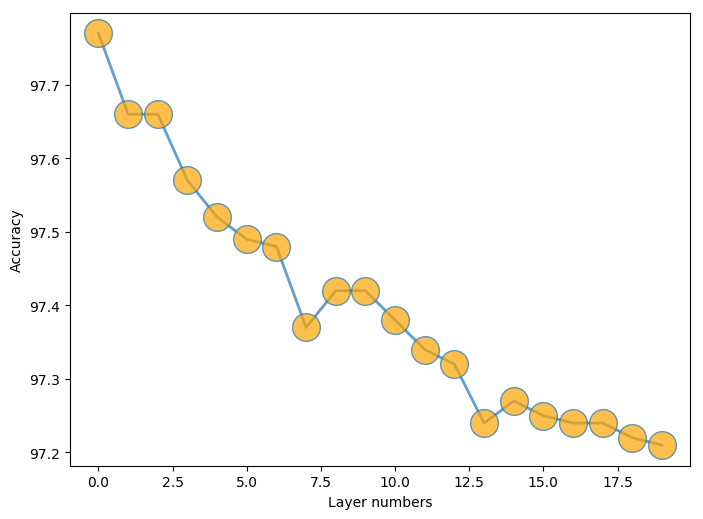

In [10]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [11]:
Accuracy

[97.77,
 97.66,
 97.66,
 97.57,
 97.52,
 97.49,
 97.48,
 97.37,
 97.42,
 97.42,
 97.38,
 97.34,
 97.32,
 97.24,
 97.27,
 97.25,
 97.24,
 97.24,
 97.22,
 97.21]